In [1]:
import pandas as pd
import requests
import json
from io import BytesIO
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://api-metrika.yandex.net/stat/v1/data?'
visits = 'metrics=ym:s:visits&dimensions=ym:s:date&id=44147844'

In [3]:
visits_url = url + visits

In [4]:
visits_request = requests.get(visits_url)

In [5]:
visits_request

<Response [200]>

In [6]:
json_data = json.loads(visits_request.text)

In [7]:
json_data['data']

[{'dimensions': [{'name': '2025-03-19'}], 'metrics': [287.0]},
 {'dimensions': [{'name': '2025-03-14'}], 'metrics': [285.0]},
 {'dimensions': [{'name': '2025-03-18'}], 'metrics': [273.0]},
 {'dimensions': [{'name': '2025-03-17'}], 'metrics': [251.0]},
 {'dimensions': [{'name': '2025-03-15'}], 'metrics': [230.0]},
 {'dimensions': [{'name': '2025-03-16'}], 'metrics': [201.0]},
 {'dimensions': [{'name': '2025-03-20'}], 'metrics': [27.0]}]

In [8]:
y_df = pd.DataFrame([(i['dimensions'][0]['name'], 
  i['metrics'][0]) for i in json_data['data']], columns=['date', 
                                                        'visits'])

In [9]:
y_df

,date,visits
0,2025-03-19,287.0
1,2025-03-14,285.0
2,2025-03-18,273.0
3,2025-03-17,251.0
4,2025-03-15,230.0
5,2025-03-16,201.0
6,2025-03-20,27.0


Download the website traffic data file from Yandex.Metrica. Using the np.where function, create a series that records 1 if the visits were made by bots using a browser with “Chrome” in its name, and 0 in other cases.

In [10]:
def get_data(public_key):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

    # Get the download link
    final_url = base_url + 'public_key=' + public_key
    response = requests.get(final_url)
    download_url = response.json()['href']
    req = requests.get(download_url)
    data = req.content

    df = pd.read_csv(BytesIO(data))
    return df

In [11]:
df_ya = get_data('https://yadi.sk/d/NU25PVVkxIEEtw')

In [12]:
df_ya.head()

,date,browser,user_type,users
0,2020-06-14,Google Chrome,People,139
1,2020-06-14,Chrome Mobile,People,35
2,2020-06-14,Google Chrome,Robots,28
3,2020-06-14,Yandex Browser,People,22
4,2020-06-14,Firefox,People,15


In [13]:
chrome_robots = pd.Series(
    np.where((df_ya.browser.str.contains('Chrome')) & (df_ya.user_type.str.contains('Robots')) , 1, 0)
    )

In [14]:
chrome_robots

0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    0
21    0
22    0
23    0
dtype: int64

Let’s make a request to the Yandex.Metrica demo data API and analyze the distribution of website visits by day. We’ll create a chart showing the number of visits from bots and regular users of Yandex.Metrica.

In [15]:
dates = [date.strftime('%Y-%m-%d') for date in pd.date_range(start = '2025-03-13', end = '2025-03-18')]

In [16]:
dates

['2025-03-13',
 '2025-03-14',
 '2025-03-15',
 '2025-03-16',
 '2025-03-17',
 '2025-03-18']

In [17]:
params = {'metrics': 'ym:s:visits',
          'dimensions': 'ym:s:date',
          'dimensions': 'ym:s:isRobot',
          'id': '44147844'}

In [18]:
data = []

for date in dates:
    params['filters'] = f"ym:s:date=='{date}'"
    visits_requests = requests.get(url, params=params).json()

    for row in visits_requests['data']:
        dim = row['dimensions'][0]
        dim['date'] = date
        dim['metrics'] = row['metrics'][0]
        data.append(dim)

In [19]:
visits_requests

{'query': {'ids': [44147844],
  'dimensions': ['ym:s:isRobot'],
  'metrics': ['ym:s:visits'],
  'sort': ['-ym:s:visits'],
  'date1': '2025-03-14',
  'date2': '2025-03-20',
  'filters': "ym:s:date=='2025-03-18'",
  'limit': 100,
  'offset': 1,
  'group': 'Week',
  'benchmarks_version': '1740960000000',
  'auto_group_size': '1',
  'attr_name': '',
  'funnel_window': '',
  'benchmarks_quantile': '50',
  'quantile': '50',
  'offline_window': '21',
  'attribution': 'LastSign',
  'currency': 'RUB',
  'benchmarks_attribution': 'Automatic',
  'adfox_event_id': '0',
  'funnel_pattern': ''},
 'data': [{'dimensions': [{'name': 'People',
     'id': 'no',
     'date': '2025-03-18',
     'metrics': 235.0}],
   'metrics': [235.0]},
  {'dimensions': [{'name': 'Robots',
     'id': 'yes',
     'date': '2025-03-18',
     'metrics': 38.0}],
   'metrics': [38.0]}],
 'total_rows': 2,
 'total_rows_rounded': False,
 'sampled': False,
 'contains_sensitive_data': False,
 'sample_share': 1.0,
 'sample_size': 154

In [20]:
data

[{'name': 'People', 'id': 'no', 'date': '2025-03-14', 'metrics': 239.0},
 {'name': 'Robots', 'id': 'yes', 'date': '2025-03-14', 'metrics': 46.0},
 {'name': 'People', 'id': 'no', 'date': '2025-03-15', 'metrics': 158.0},
 {'name': 'Robots', 'id': 'yes', 'date': '2025-03-15', 'metrics': 72.0},
 {'name': 'People', 'id': 'no', 'date': '2025-03-16', 'metrics': 149.0},
 {'name': 'Robots', 'id': 'yes', 'date': '2025-03-16', 'metrics': 52.0},
 {'name': 'People', 'id': 'no', 'date': '2025-03-17', 'metrics': 196.0},
 {'name': 'Robots', 'id': 'yes', 'date': '2025-03-17', 'metrics': 55.0},
 {'name': 'People', 'id': 'no', 'date': '2025-03-18', 'metrics': 235.0},
 {'name': 'Robots', 'id': 'yes', 'date': '2025-03-18', 'metrics': 38.0}]

In [21]:
data = pd.DataFrame(data)

In [22]:
data = data.drop('id', axis = 1)

In [23]:
data = data.rename(columns={'name': 'user_type', 'metrics': 'visits'})

<Axes: xlabel='date', ylabel='visits'>

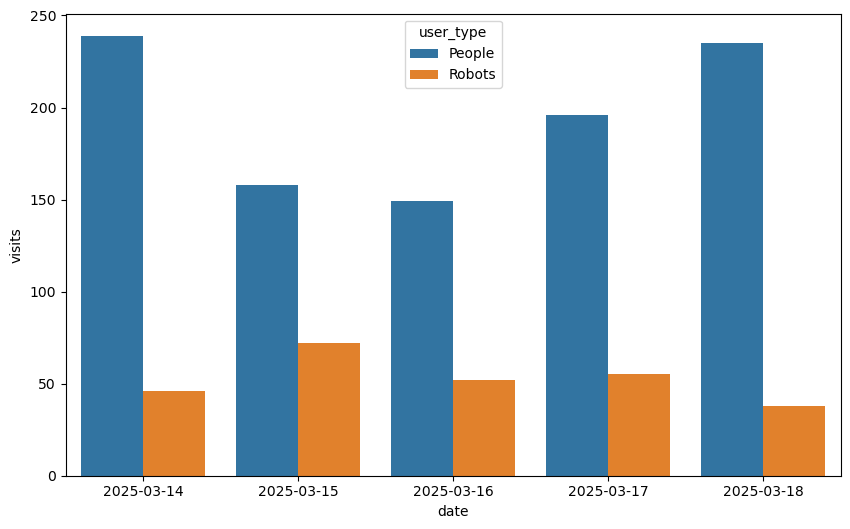

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=data, x='date', y='visits', hue='user_type', ax=ax)

Determine the percentage of visits to the Yandex.Metrica website from the Google Chrome browser. Round the answer to the nearest whole number.

In [25]:
params_2 = {
    'metrics': 'ym:s:visits',
    'dimensions': 'ym:s:date,ym:s:isRobot,ym:s:browser',
    'id': '44147844'
}

In [26]:
data_2 = []

for date in dates:
    params_2['filters'] = f"ym:s:date=='{date}'"
    visits_requests_2 = requests.get(url, params=params_2).json()

    for row in visits_requests_2['data']:
        dims = row['dimensions']
        dim = {
            'date': dims[0]['name'],  # ym:s:date
            'isRobot': dims[1]['name'],  # ym:s:isRobot
            'browser': dims[2]['name'],  # ym:s:browser
            'metrics': row['metrics'][0]  # ym:s:visits
        }
        data_2.append(dim)

In [27]:
visits_requests_2

{'query': {'ids': [44147844],
  'dimensions': ['ym:s:date', 'ym:s:isRobot', 'ym:s:browser'],
  'metrics': ['ym:s:visits'],
  'sort': ['-ym:s:visits'],
  'date1': '2025-03-14',
  'date2': '2025-03-20',
  'filters': "ym:s:date=='2025-03-18'",
  'limit': 100,
  'offset': 1,
  'group': 'Week',
  'benchmarks_version': '1740960000000',
  'auto_group_size': '1',
  'attr_name': '',
  'funnel_window': '',
  'benchmarks_quantile': '50',
  'quantile': '50',
  'offline_window': '21',
  'attribution': 'LastSign',
  'currency': 'RUB',
  'benchmarks_attribution': 'Automatic',
  'adfox_event_id': '0',
  'funnel_pattern': ''},
 'data': [{'dimensions': [{'name': '2025-03-18'},
    {'name': 'People', 'id': 'no'},
    {'icon_id': '6',
     'icon_type': 'browser',
     'name': 'Google Chrome',
     'id': '6'}],
   'metrics': [112.0]},
  {'dimensions': [{'name': '2025-03-18'},
    {'name': 'People', 'id': 'no'},
    {'icon_id': '70',
     'icon_type': 'browser',
     'name': 'Yandex Browser',
     'id': '70

In [28]:
data_2

[{'date': '2025-03-14',
  'isRobot': 'People',
  'browser': 'Google Chrome',
  'metrics': 114.0},
 {'date': '2025-03-14',
  'isRobot': 'People',
  'browser': 'Chrome Mobile',
  'metrics': 36.0},
 {'date': '2025-03-14',
  'isRobot': 'Robots',
  'browser': 'Chrome Mobile',
  'metrics': 30.0},
 {'date': '2025-03-14',
  'isRobot': 'People',
  'browser': 'Yandex Browser',
  'metrics': 25.0},
 {'date': '2025-03-14',
  'isRobot': 'Robots',
  'browser': 'Google Chrome',
  'metrics': 15.0},
 {'date': '2025-03-14',
  'isRobot': 'People',
  'browser': 'Firefox',
  'metrics': 12.0},
 {'date': '2025-03-14',
  'isRobot': 'People',
  'browser': 'Edge',
  'metrics': 12.0},
 {'date': '2025-03-14',
  'isRobot': 'People',
  'browser': 'Safari',
  'metrics': 11.0},
 {'date': '2025-03-14',
  'isRobot': 'People',
  'browser': 'Mobile Safari',
  'metrics': 11.0},
 {'date': '2025-03-14',
  'isRobot': 'People',
  'browser': 'Android Browser',
  'metrics': 4.0},
 {'date': '2025-03-14',
  'isRobot': 'People',
  

In [29]:
data_2 = pd.DataFrame(data_2)

In [30]:
data_2.head()

,date,isRobot,browser,metrics
0,2025-03-14,People,Google Chrome,114.0
1,2025-03-14,People,Chrome Mobile,36.0
2,2025-03-14,Robots,Chrome Mobile,30.0
3,2025-03-14,People,Yandex Browser,25.0
4,2025-03-14,Robots,Google Chrome,15.0


In [31]:
data_2 = data_2.rename(columns={'metrics': 'visits'})

In [32]:
data_2.loc[data_2.browser == 'Google Chrome'].visits.sum()

523.0

In [33]:
(data_2.loc[data_2.browser == 'Google Chrome'].visits.sum() / data_2.visits.sum() * 100).round(0)

42.0

Let’s determine which browser has the highest share of bot visits compared to the total visits on the site. Look at the data and identify which browser has the largest proportion of bot visits out of the total visits in that browser

In [34]:
data_2.date.unique()

array(['2025-03-14', '2025-03-15', '2025-03-16', '2025-03-17',
       '2025-03-18'], dtype=object)

In [35]:
visits_ut_b = data_2.groupby(['browser', 'isRobot']).visits.sum()

In [36]:
visits_ut_b.head()

browser          isRobot
Android Browser  People      18.0
                 Robots       1.0
Chrome Mobile    People     188.0
                 Robots     167.0
Edge             People      50.0
Name: visits, dtype: float64

In [37]:
visits_b = data_2.groupby('browser').visits.sum()

In [38]:
visits_b.head()

browser
Android Browser     19.0
Chrome Mobile      355.0
Edge                53.0
Firefox             46.0
Firefox Mobile       2.0
Name: visits, dtype: float64

In [39]:
shares = visits_ut_b / visits_b 

In [40]:
shares

browser                        isRobot
Android Browser                People     0.947368
                               Robots     0.052632
Chrome Mobile                  People     0.529577
                               Robots     0.470423
Edge                           People     0.943396
                               Robots     0.056604
Firefox                        People     0.956522
                               Robots     0.043478
Firefox Mobile                 People     1.000000
Google Chrome                  People     0.850860
                               Robots     0.149140
Google: mobile app             People     1.000000
HeadlessChrome                 Robots     1.000000
Huawei Browser                 People     1.000000
MIUI                           People     1.000000
MQQBrowser                     People     1.000000
Mobile Safari                  People     0.926829
                               Robots     0.073171
Opera                          People     1

In [41]:
shares.loc[:, 'Robots'].sort_values(ascending = False)

browser
HeadlessChrome              1.000000
Chrome Mobile               0.470423
Yandex Start: mobile app    0.200000
Google Chrome               0.149140
Mobile Safari               0.073171
Edge                        0.056604
Android Browser             0.052632
Firefox                     0.043478
Yandex Browser              0.026087
Name: visits, dtype: float64

In [42]:
date_visits = (data_2.groupby('date').visits.sum() / data_2.visits.sum() * 100).to_frame()

In [43]:
date_visits = date_visits.reset_index()

In [44]:
date_visits.rename(columns={'visits': 'perc'}, inplace=True)

In [45]:
data_2 = data_2.merge(date_visits, on='date')

In [46]:
data_2.query("isRobot == 'People' & browser == 'Safari'")

,date,isRobot,browser,visits,perc
7,2025-03-14,People,Safari,11.0,22.983871
28,2025-03-15,People,Safari,3.0,18.548387
40,2025-03-16,People,Safari,4.0,16.209677
59,2025-03-17,People,Safari,7.0,20.241935
79,2025-03-18,People,Safari,8.0,22.016129


In [47]:
round(data_2.query("isRobot == 'People' & browser == 'Safari'")['perc'], 1)

7     23.0
28    18.5
40    16.2
59    20.2
79    22.0
Name: perc, dtype: float64

Using the **gspread** library, send the data to a **Google Spreadsheet**. Then, send the link to the resulting file in Google Spreadsheet o yourself in a **VK private message** using the **VK API**

In [63]:
import gspread
import vk_api
import numpy as np

In [50]:
SERVICE_ACCOUNT_FILE = '/Users/iaroslav/Downloads/citric-dream-454109-t6-9ed63c964093.json'

In [51]:
gc = gspread.service_account(filename = SERVICE_ACCOUNT_FILE)

In [52]:
sh = gc.create('project_metrica')

In [53]:
email = 'yrslv.trgb@gmail.com'

In [54]:
sh.share(email, perm_type='user', role='writer')

<Response [200]>

In [55]:
worksheet = sh.get_worksheet(0)

In [56]:
worksheet.update([data_2.columns.values.tolist()] + data_2.values.tolist())

{'spreadsheetId': '1ZR_0Qpnu9koTRvOxwldceoquk-VRpSuWn9q8-J04-NI',
 'updatedRange': 'Sheet1!A1:E90',
 'updatedRows': 90,
 'updatedColumns': 5,
 'updatedCells': 449}

In [58]:
link = sh.url

In [59]:
link

'https://docs.google.com/spreadsheets/d/1ZR_0Qpnu9koTRvOxwldceoquk-VRpSuWn9q8-J04-NI'

In [61]:
with open('/Users/iaroslav/Git/vk_key.txt') as f:
    token = f.read().strip()

vk_session = vk_api.VkApi(token=token)
vk = vk_session.get_api()

In [65]:
vk.messages.send(
    chat_id=1,
    random_id=np.random.randint(1, 2**3),
    message=link)

0